## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from datetime import date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housedata = pd.read_csv("train.csv")

In [3]:
# To get the summary statistics
housedata.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
# To get the concise summary of the dataset
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# To get the dimensionality of the dataset
housedata.shape

(1460, 81)

In [6]:
# To view head of the dataset
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# To view tail of the dataset
housedata.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
# To check for empty strings exist in the dataframe
np.where(housedata.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

#### Observations from the Dataset 
- There are no abbreviations\encoded column names
- Data consists of 1460 rows, 81 columns
- There are NaN values in the dataset
- There are no empty strings in the dataset
- There are no misaligned columns
- No column names are missing
- There are no incorrect header or footer rows


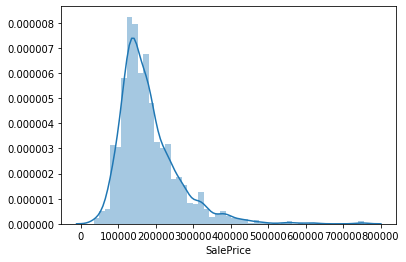

In [9]:
# To show the distribution of dependent variable.
sns.distplot(housedata['SalePrice'])
plt.show()

#### Target variable is right skewed, so there are outliers in the data. We need to handle the outliers by transforming the target variable.

### 2. Data Cleaning

There are 81 columns in the dataset. Need to eliminate the unnecessary columns in the dataset. 

First let me check the missing values in each column. There are some columns having meaningful null values and actual null values. I will deal with meaningful null values first.

In [10]:
# To replace meaningful null values with some meaningful value

# To replace NA values with 'No Fireplace' value in the column
housedata.FireplaceQu.fillna('No Fireplace', inplace=True)

# To replace NA values with 'No Garage' value in the column
housedata.GarageType.fillna('No Garage', inplace=True)
housedata.GarageFinish.fillna('No Garage', inplace=True)
housedata.GarageQual.fillna('No Garage', inplace=True)
housedata.GarageCond.fillna('No Garage', inplace=True)

# To replace NA values with 'No Basement' value in the column
housedata.BsmtQual.fillna('No Basement', inplace=True)
housedata.BsmtCond.fillna('No Basement', inplace=True)
housedata.BsmtExposure.fillna('No Basement', inplace=True)
housedata.BsmtFinType1.fillna('No Basement', inplace=True)
housedata.BsmtFinType2.fillna('No Basement', inplace=True)

In [11]:
# To check for percentage of missing values present in each column.
mv = round(100*(housedata.isna().sum(axis=0)/len(housedata.Id)), 2)
mv.loc[mv > 0]

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

#### There are 4 columns having more than 80% missing values. Hence we can remove these columns from the dataset.

In [12]:
# To find the number of unique values in Id column.
print("unique emp_title : %d"  % len(housedata.Id.unique()))

unique emp_title : 1460


#### Id column has 1460 unique values and they represent the row number so we can delete the column.

In [13]:
# To drop 4 columns.
cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']
housedata.drop(cols, axis=1, inplace=True)

#### Next highest % of missing values are present in LotFrontage column. It is a numeric type column. It does not have any specific meaning for NA as per the data dictionary.

In [14]:
# To check the descriptive statistics of LotFrontage column
print(housedata.LotFrontage.describe())
print("Median :",housedata.LotFrontage.median())
print("Mode :",housedata.LotFrontage.mode())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
Median : 69.0
Mode : 0    60.0
dtype: float64


In [15]:
# We can replace the NA values of LotFrontage column with mean 
housedata['LotFrontage'] = housedata['LotFrontage'].fillna((housedata['LotFrontage'].mean()))

In [16]:
# To view the descriptive stats of GarageYrBlt column
housedata.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [17]:
# To filter the numeric columns for implementing the correlation matrix
numvar=housedata.select_dtypes(include=['int64','float64'])

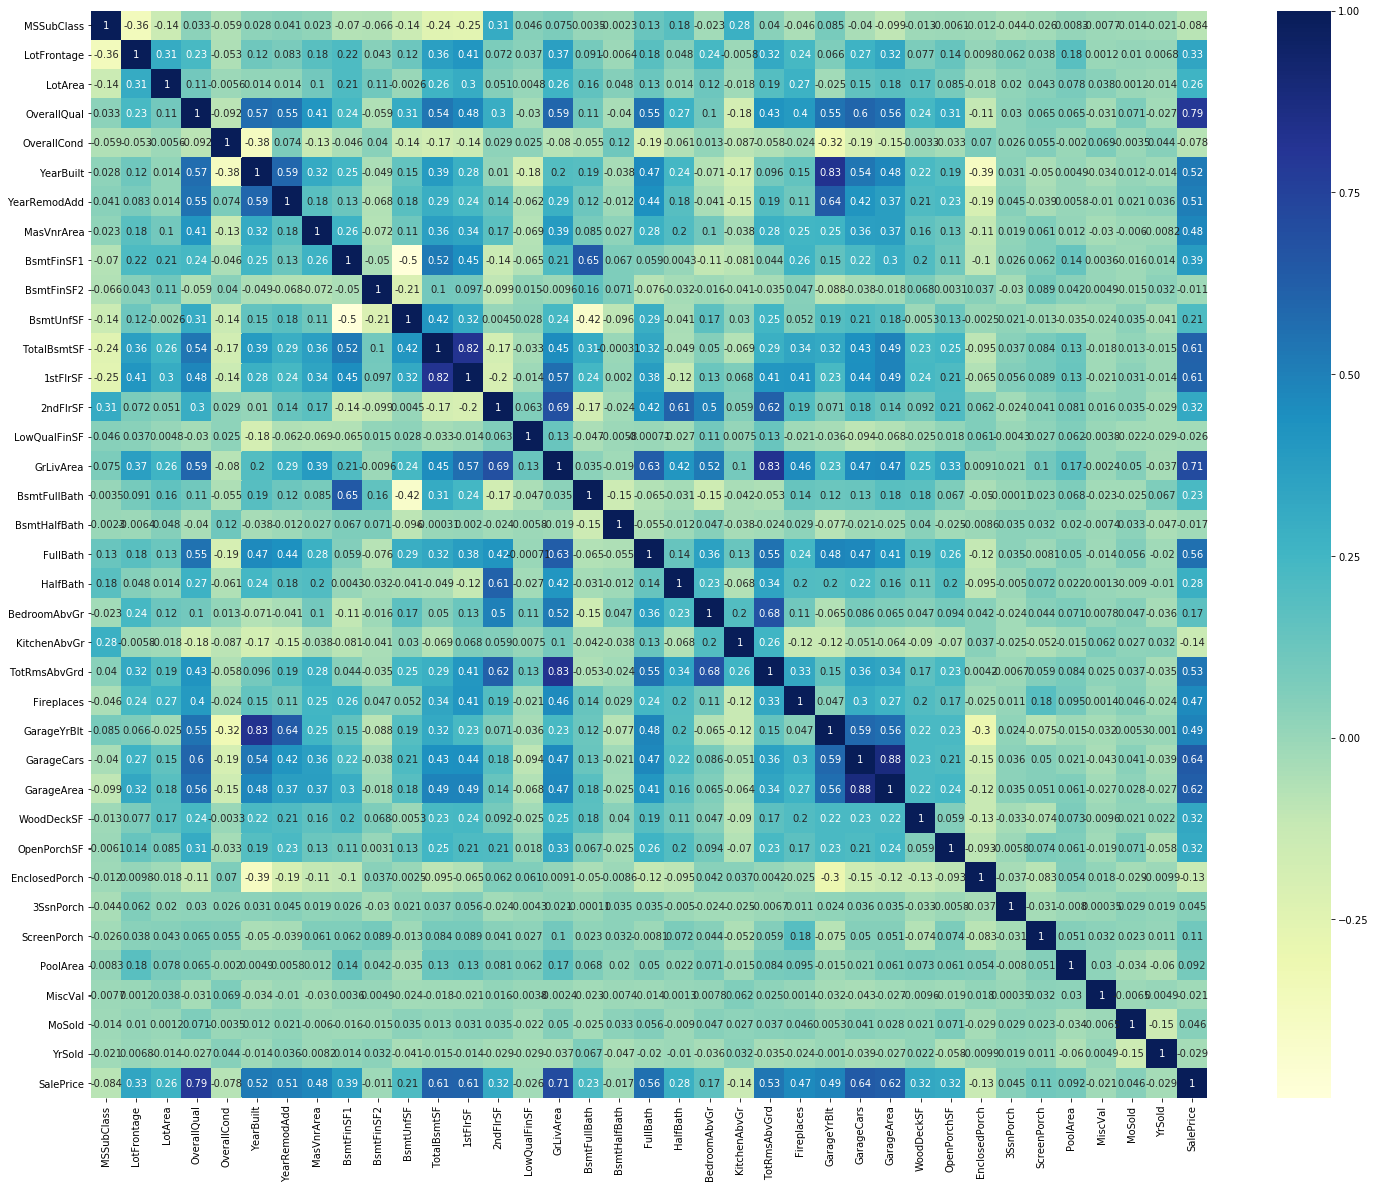

In [18]:
# To plot the numerical variables
fig, ax = plt.subplots(figsize=(25, 20))
corr = numvar.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, cmap="YlGnBu", annot=True)
bottom, top = plt.ylim()
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top) 
plt.show()

#### Observed below points from correlation matrix
- GarageArea and GarageCars are having highest positive correlation of 0.88
- GarageYrBlt and YearBuilt are having positive correlation of 0.83
- TotRmsAbvGrd and GrLivArea are having positive correlation of 0.83
- 1stFlrSF and TotalBsmtSF are hainvg positive correlation of 0.82

We can delete one column from each combination

In [19]:
# list of columns to drop
dropcols = ['GarageCars', 'GarageYrBlt', 'GrLivArea', '1stFlrSF']

#Dropping the columns
housedata.drop(dropcols, axis=1, inplace=True)

In [20]:
housedata.shape

(1460, 72)

### 3.Data preparation

#### Derived features

#### There are 3 columns which are having year values. We can convert them to
- YearBuilt   
- YearRemodAdd   
- YrSold   

We can subtract actual year values from current year.

In [21]:
# To create derived columns of age
cyear=date.today().year
housedata['HouseAge'] = cyear - housedata['YearBuilt']
housedata['RemodelAge'] = cyear - housedata['YearRemodAdd']
housedata['SoldAge'] = cyear - housedata['YrSold']

# To delete columns of year
dropcolsyr = ['YearBuilt', 'YearRemodAdd', 'YrSold']
housedata.drop(dropcolsyr, axis=1, inplace=True)

In [22]:
# To filter the categorical columns for implementing the dummy variables
catvar=housedata.select_dtypes(include=['object'])

In [23]:
# To convert categorical variables to dummies
housedata_dummies = pd.get_dummies(catvar, drop_first=True)

In [24]:
# drop categorical variables 
housedata = housedata.drop(list(catvar.columns), axis=1)

In [25]:
# concat dummy variables with X
housedata = pd.concat([housedata, housedata_dummies], axis=1)

In [26]:
housedata.shape

(1460, 243)

#### Handling outliers

In [27]:
# To handle the outliers
Q1 = housedata.quantile(0.1)
Q3 = housedata.quantile(0.9)
IQR = Q3 - Q1
housedata = housedata[((housedata < (Q1 - 1.5 * IQR)) | (housedata > (Q3 + 1.5 * IQR))).any(axis=1)]
housedata.shape

(1393, 243)

In [28]:
housedata.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)

In [29]:
# To drop rows having NA values
housedata.dropna(inplace = True)

In [30]:
# split into X and y
X = housedata.drop(['SalePrice'], axis=1)
y = housedata['SalePrice'].apply(np.log) # applying log transformation for the target variable

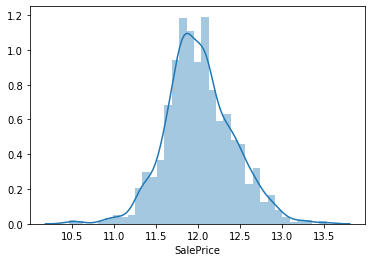

In [31]:
# To show the distribution of dependent variable after transformation.
sns.distplot(y)
plt.show()

In [32]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [33]:
#Scaling the numerical columns
scaler = StandardScaler()
numvarcols = list(housedata.select_dtypes(include=['int64','float64']).columns)
numvarcols.remove('SalePrice')
X_train[numvarcols] = scaler.fit_transform(X_train[numvarcols])

In [34]:
# To tranform the test data
X_test[numvarcols] = scaler.transform(X_test[numvarcols])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
684,0.060967,-0.512411,0.526675,0.674182,-0.538864,-0.393148,-0.967366,-0.291629,1.523028,0.324681,...,0,0,0,0,1,0,0,0,1,0
1136,-0.171402,0.449580,-0.093922,-0.042876,-0.538864,-0.552437,-0.363836,-0.291629,0.474900,-0.031550,...,0,0,0,0,1,0,0,0,0,0
1023,1.455182,-1.168314,-0.649431,0.674182,-0.538864,-0.478102,-0.932878,-0.291629,1.842435,0.654686,...,0,0,0,0,1,0,0,0,1,0
1330,-0.868510,0.668215,-0.059300,1.391239,-0.538864,1.624513,-0.967366,-0.291629,2.452858,1.183568,...,0,0,0,0,1,0,0,0,1,0
1102,-0.868510,0.012311,-0.318965,-0.759933,1.224029,-0.313504,0.300047,-0.291629,-0.305872,-0.079630,...,0,0,0,0,1,0,0,1,0,0


### 4.Model building and evaluation

### Model 1

#### Ridge Regression 

In [35]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [36]:
# To check the optimal value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.1055831608897228


In [37]:
# To get the result of cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098501,1.543527e-01,0.0025,0.002739,0.0001,{'alpha': 0.0001},-0.104361,-0.117511,-0.108148,-0.120060,...,-0.113153,0.005924,27,-0.066656,-0.068472,-0.070073,-0.062168,-0.060869,-0.065648,0.003564
1,0.010000,1.581250e-03,0.0015,0.001225,0.001,{'alpha': 0.001},-0.104392,-0.117431,-0.108097,-0.120061,...,-0.113078,0.005889,26,-0.066735,-0.068481,-0.070133,-0.062257,-0.060915,-0.065704,0.003555
2,0.009500,1.870948e-03,0.0020,0.001000,0.01,{'alpha': 0.01},-0.104931,-0.116657,-0.107655,-0.120275,...,-0.112579,0.005643,25,-0.067650,-0.068557,-0.070879,-0.063241,-0.061556,-0.066376,0.003456
3,0.010000,1.168008e-07,0.0020,0.001000,0.05,{'alpha': 0.05},-0.106835,-0.114264,-0.107520,-0.122155,...,-0.112343,0.005577,23,-0.071039,-0.068811,-0.073240,-0.067041,-0.065146,-0.069055,0.002858
4,0.010500,1.000071e-03,0.0015,0.001225,0.1,{'alpha': 0.1},-0.107411,-0.112173,-0.107802,-0.124139,...,-0.112390,0.006129,24,-0.073347,-0.069076,-0.074972,-0.069498,-0.067805,-0.070940,0.002736


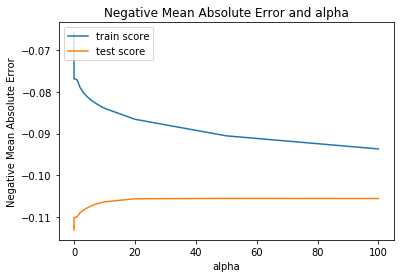

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [39]:
# To fit the ridge model with optimal value of alpha
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.02235320e-02, -1.25401660e-02,  2.00613142e-02,  9.72552927e-02,
        4.98978924e-02,  7.72914302e-03,  9.13286183e-03,  7.29409064e-03,
        1.80952565e-02,  2.85087405e-02,  4.17103665e-02,  5.80895363e-03,
        3.20816002e-02,  3.09790534e-03,  3.61635983e-02,  2.29981303e-02,
        9.44092442e-03, -4.90899816e-03,  5.23291259e-02,  2.76566949e-02,
        4.67270566e-02,  1.49512642e-02, -4.18417243e-03,  9.46697504e-03,
        3.02871682e-03,  1.97931382e-02, -3.44355481e-03, -2.23591927e-03,
        1.31746483e-03, -3.28600981e-02, -2.46219874e-02,  1.00871882e-02,
        1.67108853e-02,  9.13340060e-03,  4.19877462e-02, -1.88050673e-02,
        1.08409089e-02,  1.82918668e-02, -2.70051232e-02, -5.28407211e-03,
        1.17001662e-02,  1.26483368e-02,  5.25143885e-03, -3.25353983e-03,
        2.00753368e-02, -7.79621359e-03, -2.76339789e-03, -1.55382918e-02,
        1.57285611e-02,  5.79160050e-04, -3.15189573e-03, -1.11334576e-02,
        8.73404908e-03,  

### Model 2

### Lasso regression

In [40]:
# list of alphas to tune
params = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [41]:
# To check the optimal value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.10583347727382424


In [42]:
# To get the cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.270004,0.031025,0.0010,0.001225,1e-06,{'alpha': 1e-06},-0.104172,-0.118226,-0.108234,-0.119872,...,-0.112917,0.005939,4,-0.066708,-0.068516,-0.070133,-0.062225,-0.060923,-0.065701,0.003563
1,0.241004,0.029479,0.0010,0.001225,1e-05,{'alpha': 1e-05},-0.103007,-0.115951,-0.107961,-0.118500,...,-0.111340,0.005539,3,-0.067302,-0.068837,-0.070583,-0.062793,-0.061415,-0.066186,0.003518
2,0.099502,0.023420,0.0020,0.001000,0.0001,{'alpha': 0.0001},-0.102051,-0.102430,-0.108023,-0.115603,...,-0.106932,0.004911,2,-0.075527,-0.071413,-0.077097,-0.071456,-0.069912,-0.073081,0.002741
3,0.015500,0.001000,0.0020,0.001000,0.001,{'alpha': 0.001},-0.100507,-0.100659,-0.108125,-0.113807,...,-0.105833,0.004981,1,-0.092670,-0.082819,-0.091455,-0.087583,-0.090485,-0.089002,0.003519
4,0.010000,0.001581,0.0015,0.001225,0.01,{'alpha': 0.01},-0.113492,-0.112008,-0.115036,-0.122143,...,-0.114148,0.004621,5,-0.110346,-0.099426,-0.110317,-0.107038,-0.111432,-0.107712,0.004397


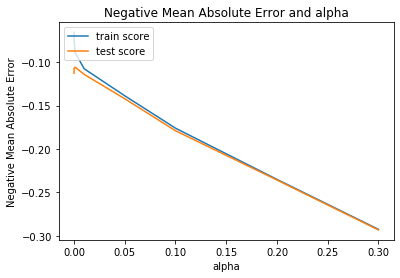

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [44]:
# To fit the lasso model with best alpha value
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
# To get the list of lasso coefficients
lasso.coef_

array([-1.86706195e-02, -1.15257511e-02,  2.14136910e-02,  1.07487539e-01,
        5.12570952e-02,  3.08728805e-03, -0.00000000e+00,  2.90062013e-03,
        1.27808006e-02,  3.31363016e-02,  4.74279413e-02,  4.49402071e-03,
        3.53398740e-02,  3.74170261e-03,  3.39975921e-02,  2.22801987e-02,
        4.14521476e-03, -3.99003317e-03,  5.62753321e-02,  2.91191969e-02,
        4.92448589e-02,  1.61886297e-02, -2.50119048e-03,  8.47808119e-03,
        1.49860024e-03,  2.02761664e-02, -0.00000000e+00, -1.95158468e-03,
        9.39337333e-05, -4.06245505e-02, -2.29293607e-02,  9.65380522e-03,
        0.00000000e+00,  0.00000000e+00,  6.02296116e-02, -0.00000000e+00,
        0.00000000e+00,  1.69630505e-02, -7.19472249e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.58138239e-02, -0.00000000e+00, -0.00000000e+00, -1.14173724e-02,
        9.40926735e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [46]:
# To predict for ridge and lasso
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

In [47]:
# To find the r2 scores of ridge and lasso models
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))
print('r2_score in test dataset')
print('r2_score for ridge:', r2_score(y_test, y_pred_ridge_test))
print('r2_score for lasso:', r2_score(y_test, y_pred_lasso_test))

r2_score in train dataset
r2_score for ridge: 0.8914150449953404
r2_score for lasso: 0.8930858807969717
r2_score in test dataset
r2_score for ridge: 0.8945553258682114
r2_score for lasso: 0.8910554773782063


In [48]:
# Model parameters
params1 = list(zip(lasso.coef_, X.columns))
params1 = [i for i in params1 if abs(i[0]!=0)]

In [49]:
# To get the list of parameters
params_list = []
for i in params1:
    params_list.append(i[1])
params_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'HouseAge',
 'RemodelAge',
 'SoldAge',
 'MSZoning_RL',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAn',
 'BldgType_Twnhs',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Gable',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Stucco',

In [50]:
### To get the top 5 features in Lasso regression using RFE
from sklearn.feature_selection import RFE
rfe = RFE(lasso, 5)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 35),
 ('LotFrontage', False, 48),
 ('LotArea', False, 30),
 ('OverallQual', True, 1),
 ('OverallCond', False, 20),
 ('MasVnrArea', False, 66),
 ('BsmtFinSF1', False, 79),
 ('BsmtFinSF2', False, 68),
 ('BsmtUnfSF', False, 43),
 ('TotalBsmtSF', False, 16),
 ('2ndFlrSF', False, 17),
 ('LowQualFinSF', False, 63),
 ('BsmtFullBath', False, 25),
 ('BsmtHalfBath', False, 65),
 ('FullBath', False, 26),
 ('HalfBath', False, 29),
 ('BedroomAbvGr', False, 62),
 ('KitchenAbvGr', False, 64),
 ('TotRmsAbvGrd', False, 6),
 ('Fireplaces', False, 24),
 ('GarageArea', False, 8),
 ('WoodDeckSF', False, 41),
 ('OpenPorchSF', False, 69),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 72),
 ('ScreenPorch', False, 37),
 ('PoolArea', False, 118),
 ('MiscVal', False, 71),
 ('MoSold', False, 77),
 ('HouseAge', False, 19),
 ('RemodelAge', False, 32),
 ('SoldAge', False, 46),
 ('MSZoning_FV', False, 109),
 ('MSZoning_RH', False, 111),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 

In [52]:
# To get list of top 5 features
col1 = X_train.columns[rfe.support_]
col_excld = list(col1)
col_excld

['OverallQual',
 'MSZoning_RL',
 'Neighborhood_NoRidge',
 'Neighborhood_Somerst',
 'CentralAir_Y']

In [53]:
# To get the list of features excluding top 5 features to be used in the lasso model 3
col2 = X_train.columns[~rfe.support_]
col_incld = list(col2)
col_incld

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'HouseAge',
 'RemodelAge',
 'SoldAge',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neig

### Model 3

#### Lasso regression

In [54]:
# To get the features excluding top 5 features from model 2
X_train_new = X_train[col_incld]
X_test_new = X_test[col_incld]

In [55]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
# To check the optimal value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.11186020389646405


In [57]:
# To get the cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.252004,0.041244,0.0020,1.000047e-03,1e-06,{'alpha': 1e-06},-0.104806,-0.126905,-0.124782,-0.127459,...,-0.122101,0.008694,5,-0.073667,-0.074272,-0.074845,-0.068819,-0.067690,-0.071859,0.002988
1,0.206503,0.031922,0.0020,1.000023e-03,1e-05,{'alpha': 1e-05},-0.103559,-0.125152,-0.124061,-0.125715,...,-0.120565,0.008523,3,-0.073991,-0.074559,-0.075354,-0.069094,-0.068152,-0.072230,0.002992
2,0.115002,0.045084,0.0005,9.999275e-04,0.0001,{'alpha': 0.0001},-0.101221,-0.114377,-0.121681,-0.122501,...,-0.115257,0.007656,2,-0.080049,-0.077459,-0.082474,-0.075844,-0.075749,-0.078315,0.002597
3,0.019500,0.004583,0.0025,1.168008e-07,0.001,{'alpha': 0.001},-0.101940,-0.110819,-0.117518,-0.120845,...,-0.111860,0.006720,1,-0.095978,-0.087316,-0.094855,-0.092505,-0.094298,-0.092990,0.003051
4,0.011500,0.002000,0.0005,9.999275e-04,0.01,{'alpha': 0.01},-0.115232,-0.126528,-0.119861,-0.127166,...,-0.120956,0.005064,4,-0.118294,-0.107980,-0.117638,-0.113995,-0.118467,-0.115275,0.003993


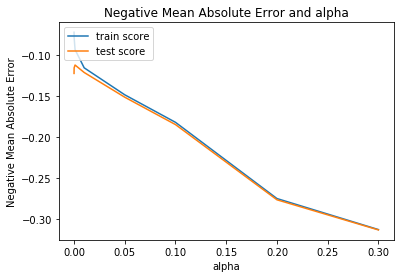

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [59]:
# To fit the lasso model with best alpha value
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
# To predict for ridge and lasso
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train_new)
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test_new)


In [61]:
# To find the r2 scores of ridge and lasso models. To get the orginal values of target variable we need to apply np.exp()
# below target values are log transformed values.
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))
print('r2_score in test dataset')
print('r2_score for ridge:', r2_score(y_test, y_pred_ridge_test))
print('r2_score for lasso:', r2_score(y_test, y_pred_lasso_test))

r2_score in train dataset
r2_score for ridge: 0.8914150449953404
r2_score for lasso: 0.8804549131000152
r2_score in test dataset
r2_score for ridge: 0.8945553258682114
r2_score for lasso: 0.8826050043042519


In [62]:
### To get the top 5 features in Lasso regression using RFE
rfe = RFE(lasso, 5)             # running RFE
rfe = rfe.fit(X_train_new, y_train)

In [63]:
# To get list of top 5 features
cols2 = X_train_new.columns[rfe.support_]
top5features = list(cols2)
top5features

['Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'RoofMatl_WdShngl',
 'Heating_Grav']

#### Conclusion

#### The significant variables in predicting the price of a house are:

 MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, MasVnrArea, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF,
 LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageArea,  WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, MoSold, HouseAge, RemodelAge, SoldAge, MSZoning_RL,  LotShape_IR2, LotShape_IR3, LotConfig_CulDSac, LotConfig_Inside, LandSlope_Mod, Neighborhood_ClearCr, Neighborhood_Crawfor,  Neighborhood_Edwards, Neighborhood_IDOTRR, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_Somerst, Neighborhood_StoneBr, Condition1_Norm, Condition1_RRAn, BldgType_Twnhs, HouseStyle_1Story, HouseStyle_2Story, RoofStyle_Gable, Exterior1st_BrkFace, Exterior1st_HdBoard, Exterior1st_MetalSd, Exterior1st_Stucco, Exterior2nd_Stucco, Exterior2nd_Wd Sdng, Exterior2nd_Wd Shng, ExterQual_Gd, ExterCond_TA, Foundation_PConc, BsmtQual_Gd, BsmtQual_TA, BsmtExposure_Gd, BsmtExposure_No, BsmtFinType1_GLQ, BsmtFinType1_Unf, BsmtFinType2_Unf, HeatingQC_Fa, CentralAir_Y, KitchenQual_Gd, KitchenQual_TA, Functional_Typ, GarageType_Attchd, GarageFinish_Unf, GarageCond_TA, PavedDrive_Y, SaleType_WD, SaleCondition_Family, SaleCondition_Normal, SaleCondition_Partial.

#### These predictor variables describe well about the prices of a house as there is very minimal difference in the accuracy of the model for train and test data.

These predictor variables include many dummy variables though.

#### The optimal value for Ridge regression is found to be 50. The optimal value for Lasso regression is found to be 0.001.